In [20]:
import numpy as np
import matplotlib.pyplot as plt

n = 500;
x = np.linspace(-10, 20, n);
target = 0.3*np.exp(-0.2 * (x**2)) + 0.7 * np.exp(-0.2 * (x - 10)**2);
xx = np.linspace(-10,20, 1000);


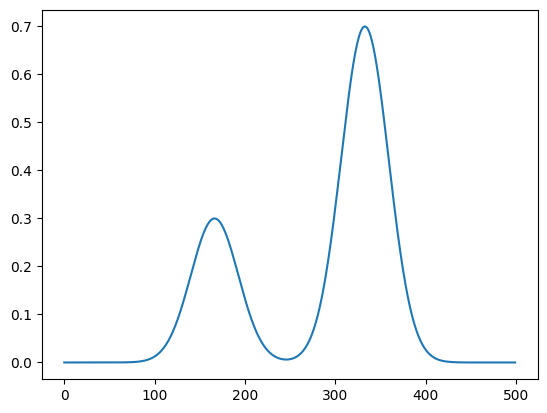

In [21]:
plt.plot(target)

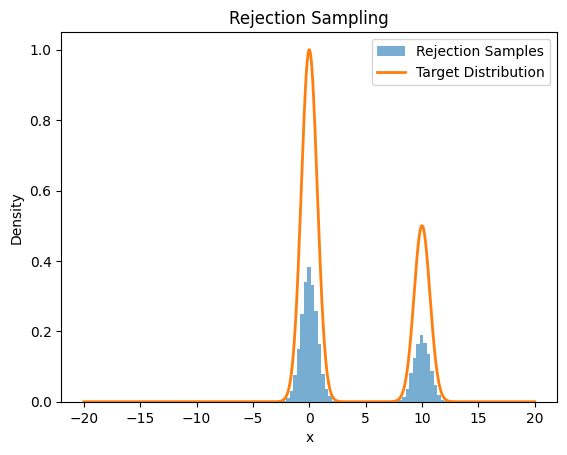

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 목표 분포 P(x) ∝ exp(-x^2)
def target_distribution(x):
    return np.exp(-x**2) + 0.5 * np.exp(-(x - 10)**2)

# 제안 분포 Q(x): 균일 분포에서 샘플링 (-3, 3)
def proposal_distribution(size):
    return np.random.uniform(-20, 20, size)

# 최대값 M: Q(x)와 P(x) 비율의 상한
M = 2.0  # M은 직접 계산하거나 실험적으로 추정 가능

# Rejection Sampling
def rejection_sampling(target_dist, proposal_dist, M, num_samples):
    samples = []
    while len(samples) < num_samples:
        x = proposal_dist(1)[0]  # Q(x)에서 샘플링
        u = np.random.uniform(0, 1)  # U(0, 1)에서 샘플링
        
        # 채택 조건: u ≤ P(x) / (M * Q(x))
        if u <= target_dist(x) / M:
            samples.append(x)
    return np.array(samples)

# 샘플 생성
num_samples = 10000
samples = rejection_sampling(target_distribution, proposal_distribution, M, num_samples)

# 시각화
x = np.linspace(-20, 20, 1000)
y_target = target_distribution(x)
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Rejection Samples")
plt.plot(x, y_target / np.max(y_target), label="Target Distribution", linewidth=2)  # 정규화된 P(x)
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Rejection Sampling")
plt.show()
